In [1]:
from scipy import stats
import handcalcs.render
import qgrid
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing
from scipy.stats import expon
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import poisson
print('Running on PyMC3 v{}'.format(pm.__version__))
sns.set()
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Running on PyMC3 v3.11.4


### Terminology

Before applying Bayes’ theorem, let’s introduce some terminology.
- Experiment: pick a coin from the drawer at random, flip it, and record the result.
- Data: the result of our experiment. In this case the event D = ‘heads’. We think of
D as data that provides evidence for or against each hypothesis. 
- Hypotheses: we are testing three hypotheses: the coin is type A, B or C . 

- Prior probability: the probability of each hypothesis prior to tossing the coin (collect-
ing data). Since the drawer has 2 coins of type A, 2 of type B and 1 or type C we
have
    - P (A) = 0.4,
    - P (B) = 0.4,
    - P (C ) = 0.2.

- Likelihood: (This is the same likelihood we used for the MLE.) The likelihood function
is P (D|H), i.e., the probability of the data assuming that the hypothesis is true. Most
often we will consider the data as fixed and let the hypothesis vary. For example,
P (D|A) = probability of heads if the coin is type A. In our case the likelihoods are
    - P (D|A) = 0.5,
    - P (D|B) = 0.6, 
    - p (D|C) =0.9
    
- The name likelihood is so well established in the literature that we have to teach it to you. However in colloquial language likelihood and probability are synonyms. This leads to the likelihood function often being confused with the probabity of a hypothesis. Because of this we’d prefer to use the name Bayes’ term. However since we are stuck with ‘likelihood’ we will try to use it very carefully and in a way that minimizes any confusion. 

-  Posterior probability: the probability (posterior to) of each hypothesis given the data
from tossing the coin.
P (A|D),
P (B|D),
P (C|D).
These posterior probabilities are what the problem asks us to find.

*What is the difference between PMF and likelihood?*
- The PMF treats data as varying from experiment to experiment and  θ
as fixed, whereas the likelihood function treats the data as fixed and the parameter θ as varying.

#### Initial Priors

In [2]:
p_a = 0.4
p_b = 0.4
p_c = 0.2

#### Initial Likelihood 

- Given we have seen one data point which is *HEAD* 
- This is also called DATA or evidence
- The likelihood function is P (D|H), i.e., the probability of the data assuming that the hypothesis is true. Most
often we will consider the data as fixed and let the hypothesis vary. For example,
P (D|A) = probability of heads if the coin is type A.

In [3]:
#probability of Heads given A
p_H_a = 0.5
p_H_b = 0.6
p_H_c = 0.9

#### Posterior Calculation

In [4]:
p_a_H = p_H_a * p_a
p_b_H = p_H_b * p_b 
p_c_H = p_H_c * p_c 

print(f'Posterior for A {p_a_H}')
print(f'Posterior for B {p_b_H}')
print(f'Posterior for C {p_c_H}')

Posterior for A 0.2
Posterior for B 0.24
Posterior for C 0.18000000000000002


In [5]:
def posterior_calc(prior, likelihood):
    posterior = prior * posteior 
    return posterior

#### Updating Priors

In [6]:
#so say we observed the second toss as HEAD again

p_a_HH = p_H_a * p_a_H
p_b_HH = p_H_b * p_b_H 
p_c_HH = p_H_c * p_c_H

print(f'Posterior for A {p_a_HH}')
print(f'Posterior for B {p_b_HH}')
print(f'Posterior for C {p_c_HH}')

Posterior for A 0.1
Posterior for B 0.144
Posterior for C 0.16200000000000003


#### All in one Code

- The Hypotheis we need to find P(H/E1, E2)
    -Which means what is thee probability of H given we see two datapoints E1,E2

- Example Consideration
    - Hypotesis (H): There are two coins A and B and our goal is to find which one it is based on the data P(H/E1,E2....E12)
    - Data: Say we observed 12 data points from E1 to E12 and are [1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1]
        - 1 means observed Heads and 0 means observed Tails
    - Prior Probability : The probability of coin A or coin B before observing any data
         say: P(A)=0.8 and P(B)=0.2
    - Likelihood: The Probability of observing this data given the hypotheis
         - P(Heads(1)/A) = 0.5 and P(Heads(1)/B)=0.85
         - P(Tails(0)/A) = 0.5 and P(Tails(1)/B)=0.15
    - Given this we information we have to calculate posterior distribution 
         - P(A/E1...E12) and P(B/E1....E12)
         - Postreior Distribution = Prior * Likelihood
            
- Algorithm 
    - Step 1: Say the first data observed is Heads = 1
    - Step 2: Calculate Posterior = likelihood*priors
           P(A/E1)= 0.5 * 0.8=.40/P(E1) and P(B/E1)= 0.85*.2=0.17/P(E12)
    - Step 3: Now we observe our another sample E2= Heads = 1
    - Step 4: Our posterior in Step 2 becomes the new prior and likelihood is the same for our hypotheesis
    - Step 5: Updated posteriors are:
            P(A/E1,E2) = P(E2/A)*P(A/E1) = 0.5*0.40=.20/P(E1,E2)  
            P(B/E1,E2) = P(E2/B)*P(B/E1) = 0.85*.17=0.1445/P(E1,E2)
            
    - Step 6: We normalize the posterior probability numerator to 1 since we only care which hypotheesissis has a better chance and ndenominator is thee same
            - After Sample 1 (Heads): 0.70175439 0.29824561
            - After Sample 2: (Heads): 0.58055152 0.41944848
    - Step 7: I have simulated this data for 12 datapoints and shown how if we keep observing one the chances of coin B which is Biased increases eeven though it has a low priors

In [7]:

priors = np.asarray([0.8,.2])
likelihood = np.asarray([0.5,.85])

In [8]:
def update_posterior(priors, likelihood, samples):
  n_step_posterior = []
  for i in range(len(samples)): 
    if samples[i]==1:
        likelihood=likelihood
    else:
        likelihood=1-likelihood
    posteriors = priors*likelihood
    normalized_posteriors = posteriors/sum(posteriors)
    n_step_posterior.append(normalized_posteriors)
    priors = posteriors
  return n_step_posterior
   

In [9]:
data = [1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1]
updated_posterior_pmf = update_posterior(priors, likelihood, data)

#### Normalizing the posterior 

In [10]:
normalized = updated_posterior_pmf[-1]/sum(updated_posterior_pmf[-1])

In [11]:
normalized

array([0.02571685, 0.97428315])

[0.70175439 0.29824561]
[0.58055152 0.41944848]
[0.82186152 0.17813848]
[0.9389451 0.0610549]
[0.90046081 0.09953919]
[0.84180593 0.15819407]
[0.75788131 0.24211869]
[0.64804811 0.35195189]
[0.51994996 0.48005004]
[0.38917389 0.61082611]
[0.27261125 0.72738875]
[0.18063629 0.81936371]
[0.11479505 0.88520495]
[0.07087674 0.92912326]
[0.04294555 0.95705445]
[0.02571685 0.97428315]


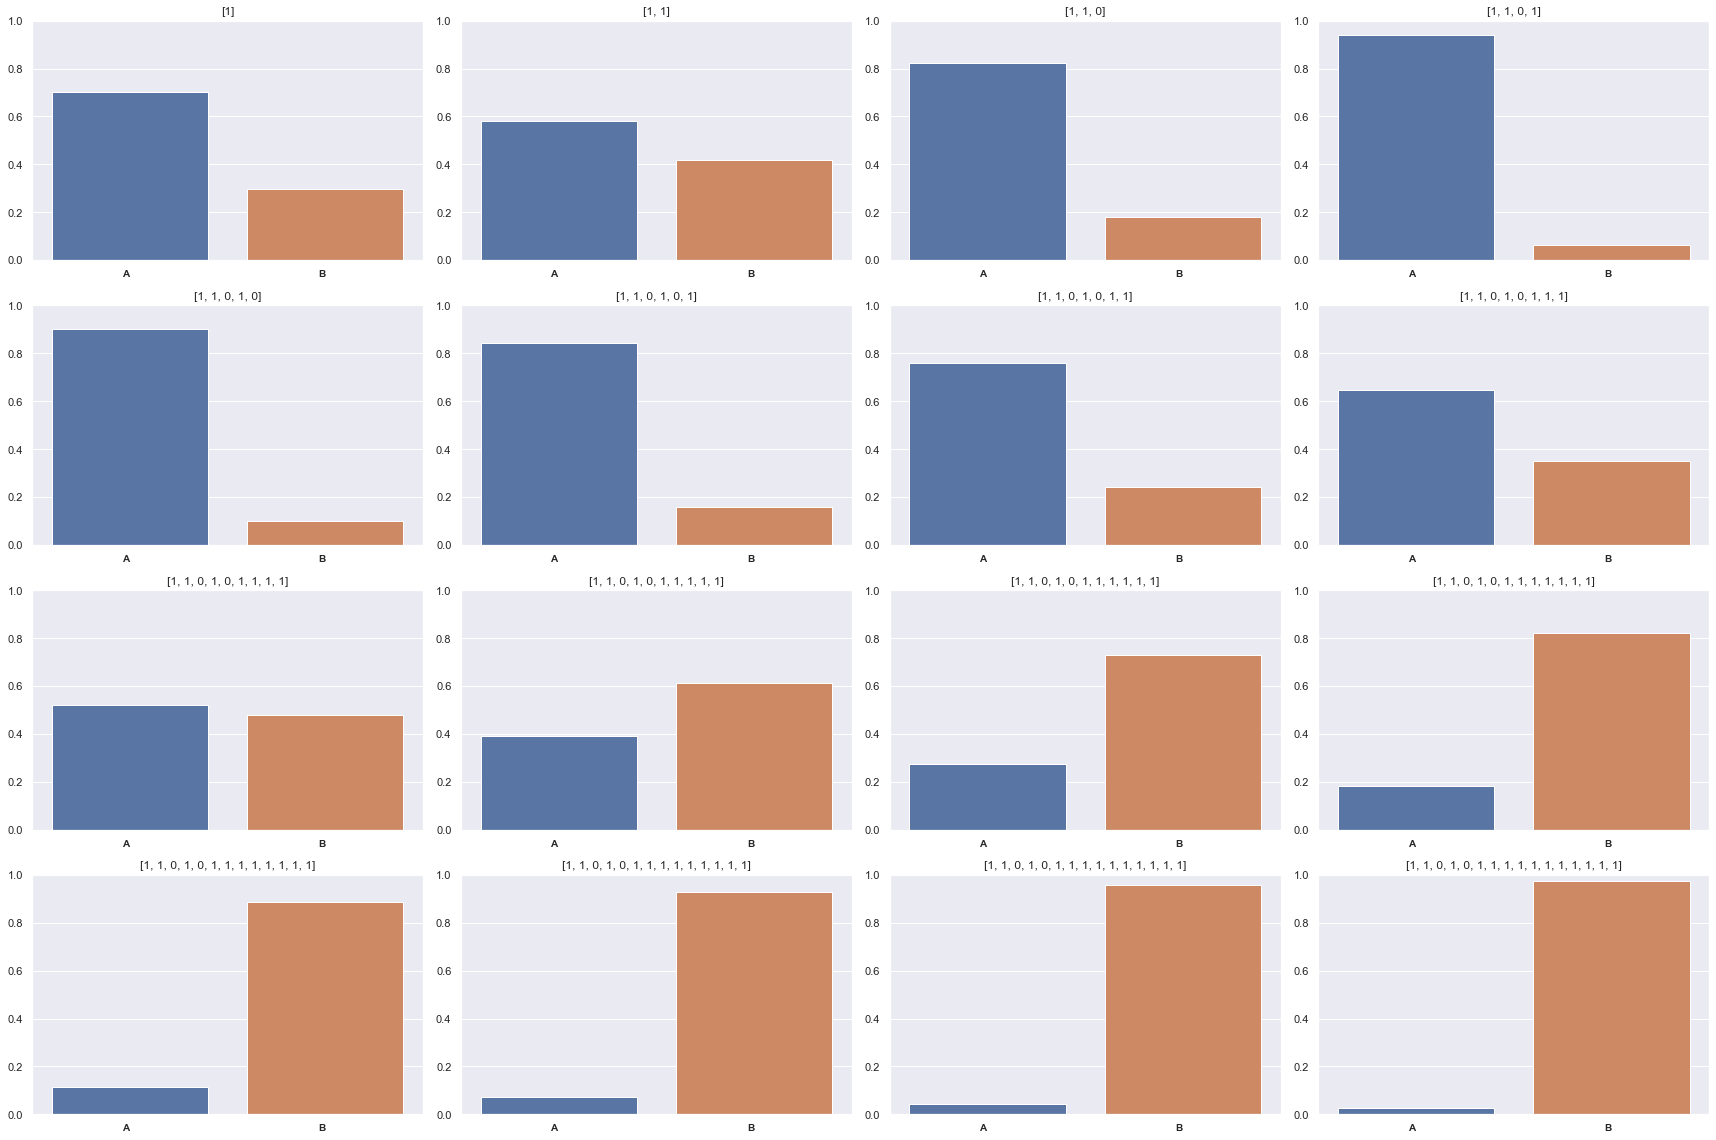

In [12]:
fig = plt.figure(figsize=[24,16])
for x,cli in enumerate(updated_posterior_pmf):
       ax=fig.add_subplot(4,4,x+1)
       print(cli)
       g = sns.barplot(x=["A","B"],y=cli,ax=ax)  
       ax.set_xlabel('',fontsize=14)
       ax.set_ylabel('',fontsize=14)
       ax.set_title(f'{data[:x+1]}')
       plt.ylim(0,1)
       plt.xticks(rotation=0, horizontalalignment='right', fontweight='bold', fontsize='small')
plt.tight_layout() 
plt.show()